In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [126]:
import pandas as pd
import numpy as np
import random
import time
data = pd.read_csv('/content/gdrive/MyDrive/machine_intelligence/drug200.csv',header = None)
data = data.to_numpy()
data = data[1:,:]

for i in range(np.shape(data)[0]):
  data[i,0] = float(data[i,0])
  data[i,4] = float(data[i,4])

dec = 100

id_0 = []
for i in range(180):
  id_0.append(i)

test_id = []
for i in range(180,200):
  test_id.append(i)


In [127]:
def Gini_index(id): #Aはノードにあるデータのリスト
  sum = 0
  drug =[0,0,0,0,0]
  for i in id:
    if data[i,5] == 'drugA':
      drug[0] += 1
    elif data[i,5] =='drugB':
      drug[1] += 1
    elif data[i,5] =='drugC':
      drug[2] += 1
    elif data[i,5] =='drugX':
      drug[3] += 1
    elif data[i,5] =='DrugY':
      drug[4] += 1
    
  for i in range(5):
    sum += (drug[i]/len(id))*(1 - drug[i]/len(id))
  return sum

def child_gini(id1,id2,id3):
  return (Gini_index(id2)*len(id2) + Gini_index(id3)*len(id3))/len(id1)


def middle(id,fea):
  value = []
  for i in id:
    value.append(data[i,fea])
  return (max(value) + min(value))/2

In [128]:
class Bagg:
  def __init__(self,m):
    self.l = [0,1,2,3,4]
  def choose(self):
    self.feature = random.sample(self.l,3)
    return self.feature

class Tree:
  def __init__(self,id_input):
    self.id_input = id_input
  def classify(self,feature):
    Q = []
    if self.id_input == []:
      return [],[],Q
    self.gini = Gini_index(self.id_input)
    if self.gini == 0:
      return self.id_input,[],Q
    self.feature = feature
    node1,node2,node3,node4,node5,node6,node7,node8,node9,node10,node11,node12,node13,node14,node15,node16,node17,node18,=[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
    self.Gini = [self.gini]*9
    for j in self.id_input:
      if 0 in self.feature:
        if data[j,0] >  middle(self.id_input,0):
          node1.append(j)
        else :
          node2.append(j)

      if 1 in self.feature:
        if data[j,1] == 'M':
          node3.append(j)
        else:
          node4.append(j)

      if 2 in self.feature:
        if data[j,2] == 'HIGH':
          node5.append(j)
        else:
          node6.append(j)

      if 2 in self.feature:
        if data[j,2] == 'NORMAL':
          node7.append(j)
        else:
          node8.append(j)

      if 2 in self.feature:
        if data[j,2] == 'LOW':
          node9.append(j)
        else:
          node10.append(j)

      if 3 in self.feature:
        if data[j,3] == 'HIGH':
          node11.append(j)
        else:
          node12.append(j)

      if 3 in self.feature:
        if data[j,3] == 'NORMAL':
          node13.append(j)
        else:
          node14.append(j)

      if 3 in self.feature:
        if data[j,3] == 'LOW':
          node15.append(j)
        else:
          node16.append(j)

      if 4 in self.feature:
        if data[j,4] >  middle(self.id_input,4) :
          node17.append(j)
        else :
          node18.append(j)
    
    if 0 in self.feature:
      if not(len(node1)==0 or len(node2)==0):
        self.Gini[0] = child_gini(self.id_input,node1,node2)
    if 1 in self.feature:
      if not(len(node3)==0 or len(node4)==0):
        self.Gini[1] = child_gini(self.id_input,node3,node4)
    if 2 in self.feature:
      if not(len(node5)==0 or len(node6)==0):
        self.Gini[2] = child_gini(self.id_input,node5,node6)
      if not(len(node7)==0 or len(node8)==0):
        self.Gini[3] = child_gini(self.id_input,node7,node8)
      if not(len(node9)==0 or len(node10)==0):
        self.Gini[4] = child_gini(self.id_input,node9,node10)
    if 3 in self.feature:
      if not(len(node11)==0 or len(node12)==0):
        self.Gini[5] = child_gini(self.id_input,node11,node12)
      if not(len(node13)==0 or len(node14)==0):
        self.Gini[6] = child_gini(self.id_input,node13,node14)
      if not(len(node15)==0 or len(node16)==0):
        self.Gini[7] = child_gini(self.id_input,node15,node16)
    if 4 in self.feature:
      if not(len(node17)==0 or len(node18)==0):
        self.Gini[8] = child_gini(self.id_input,node17,node18)
    
    self.id_Q = self.Gini.index(min(self.Gini))
    Q.append(self.id_Q)
    Q.append(middle(self.id_input,0))
    Q.append(middle(self.id_input,4))
    if self.id_Q == 0:
      return node1,node2,Q
    elif self.id_Q == 1:
      return node3,node4,Q
    elif self.id_Q == 2:
      return node5,node6,Q
    elif self.id_Q == 3:
      return node7,node8,Q
    elif self.id_Q == 4:
      return node9,node10,Q
    elif self.id_Q == 5:
      return node11,node12,Q
    elif self.id_Q == 6:
      return node13,node14,Q
    elif self.id_Q == 7:
      return node15,node16,Q
    elif self.id_Q == 8:
      return node17,node18,Q
  
class Node:
  def __init__(self,m):
    self.m = m
  
  def node_mat(self):
    Node_mat =[]
    Question = []
    H11 = Tree(id_0)
    node1_1,node1_2,Q1 = H11.classify(Feature[self.m])

    H21 = Tree(node1_1)
    H22 = Tree(node1_2)
    node2_1,node2_2,Q2 = H21.classify(Feature[self.m])
    node2_3,node2_4,Q3 = H22.classify(Feature[self.m])
    H31 = Tree(node2_1)
    H32 = Tree(node2_2) 
    H33 = Tree(node2_3)
    H34 = Tree(node2_4)
    node3_1,node3_2,Q4 = H31.classify(Feature[self.m])
    node3_3,node3_4,Q5 = H32.classify(Feature[self.m])
    node3_5,node3_6,Q6 = H33.classify(Feature[self.m])
    node3_7,node3_8,Q7 = H34.classify(Feature[self.m])
    Node_mat.append(node3_1)
    Node_mat.append(node3_2)
    Node_mat.append(node3_3)
    Node_mat.append(node3_4)
    Node_mat.append(node3_5)
    Node_mat.append(node3_6)
    Node_mat.append(node3_7)
    Node_mat.append(node3_8)
    Question.append(Q1)
    Question.append(Q2)
    Question.append(Q3)
    Question.append(Q4)
    Question.append(Q5)
    Question.append(Q6)
    Question.append(Q7)
    
    return Node_mat,Question

In [129]:
#特徴バギング
Feature =[]
for m in range(dec):
  fea_m = Bagg(m)
  Feature.append(fea_m.choose())

#学習（決定木dec個）
Q_all = []
drug_all = []
start1 = time.time()
for m in range(dec):
  H_m = Node(m)
  N_m,q_m = H_m.node_mat()

  drug_id = []
  Q_all.append(q_m)
  for i in range(8):
    count = [0,0,0,0,0]
    if not(N_m[i] == []):
      for j in N_m[i]:
        if data[j,5] == 'drugA':
          count[0] += 1
        elif data[j,5] == 'drugB':
          count[1] += 1
        elif data[j,5] == 'drugC':
          count[2] += 1
        elif data[j,5] == 'drugX':
          count[3] += 1
        elif data[j,5] == 'DrugY':
          count[4] += 1
      drug_id.append(count.index(max(count)))
    else:
      drug_id.append('NAN')
     
  drug_all.append(drug_id)

elapsed_time1 = time.time() - start1
print(elapsed_time1)
#print(Q_all)
#print(drug_all)

#学習済みモデル
class model:
  def __init__(self,Q_all,drug_all):
    self.Q_all = Q_all
    self.drug_all = drug_all
    

  def test_tree(self,test_id,m,i):
    self.test_id = test_id
    self.m = m
    self.i = i
    if self.test_id == []:
      return [],[]
    if self.Q_all[self.m][self.i] == []:
      return self.test_id,[]
    A = []
    B = []
    for j in self.test_id:
      if self.Q_all[self.m][self.i][0] == 0:
        if data[j,0] > self.Q_all[self.m][self.i][1]:
          A.append(j)
        else :
          B.append(j)

      elif self.Q_all[self.m][self.i][0] == 1:
        if data[j,1] == 'M':
          A.append(j)
        else:
          B.append(j)

      elif self.Q_all[self.m][self.i][0] == 2:
        if data[j,2] == 'HIGH':
          A.append(j)
        else:
          B.append(j)
      
      elif self.Q_all[self.m][self.i][0] == 3:
        if data[j,2] == 'NORMAL':
          A.append(j)
        else:
          B.append(j)

      elif self.Q_all[self.m][self.i][0] == 4:
        if data[j,2] == 'LOW':
          A.append(j)
        else:
          B.append(j)

      elif self.Q_all[self.m][self.i][0] == 5:
        if data[j,3] == 'HIGH':
          A.append(j)
        else:
          B.append(j)

      elif self.Q_all[self.m][self.i][0] == 6:
        if data[j,3] == 'NORMAL':
          A.append(j)
        else:
          B.append(j)
        
      elif self.Q_all[self.m][self.i][0] == 7:
        if data[j,3] == 'LOW':
          A.append(j)
        else:
          B.append(j)

      elif self.Q_all[self.m][self.i][0] == 8:
        if data[j,4] > self.Q_all[self.m][self.i][2]:
          A.append(j)
        else :
          B.append(j)

    return A,B

2.018839120864868


In [130]:
#推論
count_mat = np.zeros((20,5))
start2 = time.time()
for m in range(dec):

  P0 = model(Q_all,drug_all)
  test_node1,test_node2 = P0.test_tree(test_id,m,0)

  test_node3,test_node4 = P0.test_tree(test_node1,m,1)
  test_node5,test_node6 = P0.test_tree(test_node2,m,2)

  test_node7,test_node8 = P0.test_tree(test_node3,m,3)
  test_node9,test_node10 = P0.test_tree(test_node4,m,4)
  test_node11,test_node12 = P0.test_tree(test_node5,m,5)
  test_node13,test_node14 = P0.test_tree(test_node6,m,6)

  sum1 = 0
  for i in test_id:
    if i in test_node7:
      count_mat[sum1,drug_all[m][0]] += 1
    elif i in test_node8:
      count_mat[sum1,drug_all[m][1]] += 1
    elif i in test_node9:
      count_mat[sum1,drug_all[m][2]] += 1
    elif i in test_node10:
      count_mat[sum1,drug_all[m][3]] += 1
    elif i in test_node11:
      count_mat[sum1,drug_all[m][4]] += 1
    elif i in test_node12:
      count_mat[sum1,drug_all[m][5]] += 1
    elif i in test_node13:
      count_mat[sum1,drug_all[m][6]] += 1
    elif i in test_node14:
      count_mat[sum1,drug_all[m][7]] += 1
    sum1 += 1
#print(count_mat)

num_right = 0
Drug_name = ['drugA','drugB','drugC','drugX','DrugY']
for i in range(20):
  if Drug_name[np.argmax(count_mat[i,:])] == data[i+180,5]:
    num_right += 1
  
acc = num_right/20
elapsed_time2 = time.time() - start2
print(acc)
print(elapsed_time2)


0.6
0.010009765625


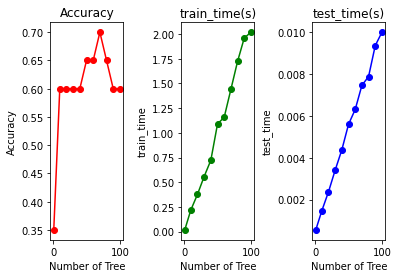

In [147]:
tree_num =[1,10,20,30,40,50,60,70,80,90,100]
acc = [0.35,0.6,0.6,0.6,0.6,0.65,0.65,0.7,0.65,0.6,0.6]
train_time = [0.016686677932739258,0.21718692779541016,0.3764631748199463,0.5574629306793213,0.7221004962921143,1.0898017883300781,1.1581273078918457,1.4398818016052246,1.723574161529541,1.9605133533477783,2.018839120864868]
test_time = [0.0005474090576171875,0.0014586448669433594,0.0023686885833740234,0.0034074783325195312,0.0043814182281494140,0.005602121353149414,0.006313800811767578,0.007465362548828125,0.007890462875366211,0.009371519088745117,0.010009765625]

import matplotlib.pyplot as plt 
fig,(ax1,ax2,ax3) = plt.subplots(1,3)
ax1.plot(tree_num,acc,'o-r')
ax2.plot(tree_num,train_time,'o-g')
ax3.plot(tree_num,test_time,'o-b')
ax1.set_title('Accuracy')
ax1.set_xlabel('Number of Tree')
ax1.set_ylabel('Accuracy')
ax2.set_title('train_time(s)')
ax2.set_xlabel('Number of Tree')
ax2.set_ylabel('train_time')
ax3.set_title('test_time(s)')
ax3.set_xlabel('Number of Tree')
ax3.set_ylabel('test_time')
plt.subplots_adjust(wspace = 0.8)
plt.show()